In [1]:
import pandas as pd
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.neighbors import KNeighborsClassifier


In [2]:
data = pd.read_table('SMSSpamCollection', delimiter='\t', names = ['Classification', 'Text'])
data

Classification                                               Text
0               ham  Go until jurong point, crazy.. Available only ...
1               ham                      Ok lar... Joking wif u oni...
2              spam  Free entry in 2 a wkly comp to win FA Cup fina...
3               ham  U dun say so early hor... U c already then say...
4               ham  Nah I don't think he goes to usf, he lives aro...
...             ...                                                ...
5567           spam  This is the 2nd time we have tried 2 contact u...
5568            ham               Will ü b going to esplanade fr home?
5569            ham  Pity, * was in mood for that. So...any other s...
5570            ham  The guy did some bitching but I acted like i'd...
5571            ham                         Rofl. Its true to its name

[5572 rows x 2 columns]

In [3]:
data.describe()

Classification                    Text
count            5572                    5572
unique              2                    5169
top               ham  Sorry, I'll call later
freq             4825                      30

In [4]:
agrouped_data = data.groupby('Classification').size()
agrouped_data = agrouped_data.reset_index()
agrouped_data.columns = ['Classification', 'Size']
total = agrouped_data['Size'].sum()
agrouped_data['Proporção'] = agrouped_data.apply(lambda row: row['Size'] / total, axis=1)
agrouped_data

Classification  Size  Proporção
0            ham  4825   0.865937
1           spam   747   0.134063

<BarContainer object of 2 artists>

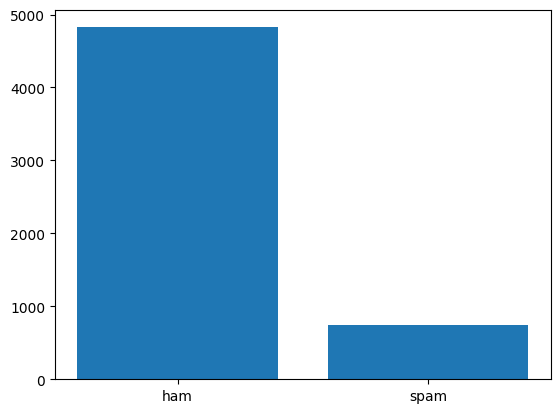

In [5]:
plt.bar(agrouped_data['Classification'], agrouped_data['Size'])

In [5]:
texts = data
texts['Number_Of_Words'] = texts['Text'].apply(lambda row: len(row.split()))
texts

Classification                                               Text  \
0               ham  Go until jurong point, crazy.. Available only ...   
1               ham                      Ok lar... Joking wif u oni...   
2              spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3               ham  U dun say so early hor... U c already then say...   
4               ham  Nah I don't think he goes to usf, he lives aro...   
...             ...                                                ...   
5567           spam  This is the 2nd time we have tried 2 contact u...   
5568            ham               Will ü b going to esplanade fr home?   
5569            ham  Pity, * was in mood for that. So...any other s...   
5570            ham  The guy did some bitching but I acted like i'd...   
5571            ham                         Rofl. Its true to its name   

      Number_Of_Words  
0                  20  
1                   6  
2                  28  
3                  11  
4                  13  
...               ...  
5567               30  
5568                8  
5569               10  
5570               26  
5571                6  

[5572 rows x 3 columns]

In [6]:
from wordcloud import WordCloud
from nltk.tokenize import RegexpTokenizer
all_text = ' '
all_text = ' '.join(texts['Text'].apply(lambda row: row.lower()))
tokenizer = RegexpTokenizer(r'\w+')
clean_tokens = tokenizer.tokenize(all_text)
clean_text = ' '.join(clean_tokens)
clean_text
print(clean_text)

go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat ok lar joking wif u oni free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry question std txt rate t c s apply 08452810075over18 s u dun say so early hor u c already then say nah i don t think he goes to usf he lives around here though freemsg hey there darling it s been 3 week s now and no word back i d like some fun you up for it still tb ok xxx std chgs to send 1 50 to rcv even my brother is not like to speak with me they treat me like aids patent as per your request melle melle oru minnaminunginte nurungu vettam has been set as your callertune for all callers press 9 to copy your friends callertune winner as a valued network customer you have been selected to receivea 900 prize reward to claim call 09061701461 claim code kl341 valid 12 hours only had your mobile 11 months or more u r entitled to update to the latest colour mobiles wi

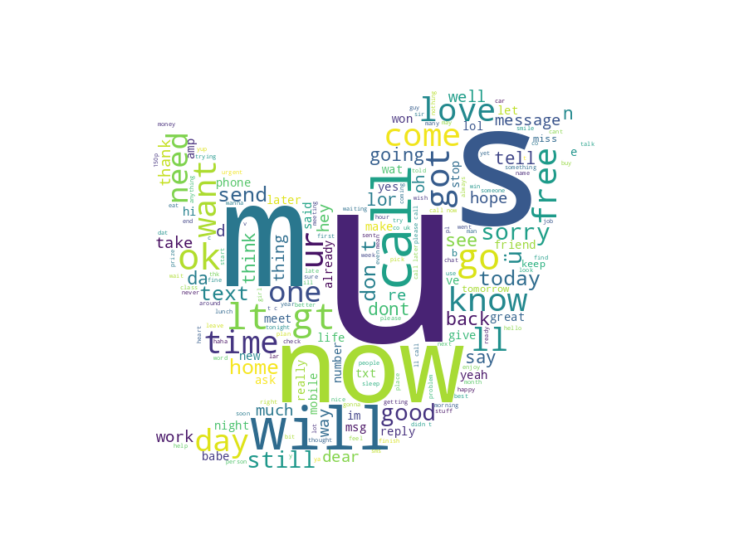

In [8]:
from PIL import Image

gmail_mask = np.array(Image.open('761_twitter.jpg'))
wordcloud = WordCloud(background_color = 'white', mask = gmail_mask).generate(clean_text)
plt.figure(figsize=(12, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [7]:
# If the use of stop_words report an error, execute the commands below 
#
# import nltk
# nltk.download('stopwords')

s = set(stopwords.words('english'))
important_words = []
for i in clean_tokens:
    if i not in s and len(i) > 1:
        important_words.append(i)
print(important_words)

['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'great', 'world', 'la', 'buffet', 'cine', 'got', 'amore', 'wat', 'ok', 'lar', 'joking', 'wif', 'oni', 'free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005', 'text', 'fa', '87121', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'apply', '08452810075over18', 'dun', 'say', 'early', 'hor', 'already', 'say', 'nah', 'think', 'goes', 'usf', 'lives', 'around', 'though', 'freemsg', 'hey', 'darling', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'send', '50', 'rcv', 'even', 'brother', 'like', 'speak', 'treat', 'like', 'aids', 'patent', 'per', 'request', 'melle', 'melle', 'oru', 'minnaminunginte', 'nurungu', 'vettam', 'set', 'callertune', 'callers', 'press', 'copy', 'friends', 'callertune', 'winner', 'valued', 'network', 'customer', 'selected', 'receivea', '900', 'prize', 'reward', 'claim', 'call', '09061701461', 'claim', 'code', 'kl341', 'valid', '12', 'hours'

In [8]:
words = pd.DataFrame(important_words)
frequency = words.value_counts().reset_index()
frequency.columns = ['Word', 'Frequency']
frequency

Word  Frequency
0         call        593
1          get        391
2           ur        391
3           gt        318
4           lt        316
...        ...        ...
8572   havbeen          1
8573      hava          1
8574  hav2hear          1
8575     haunt          1
8576       〨ud          1

[8577 rows x 2 columns]

<BarContainer object of 100 artists>

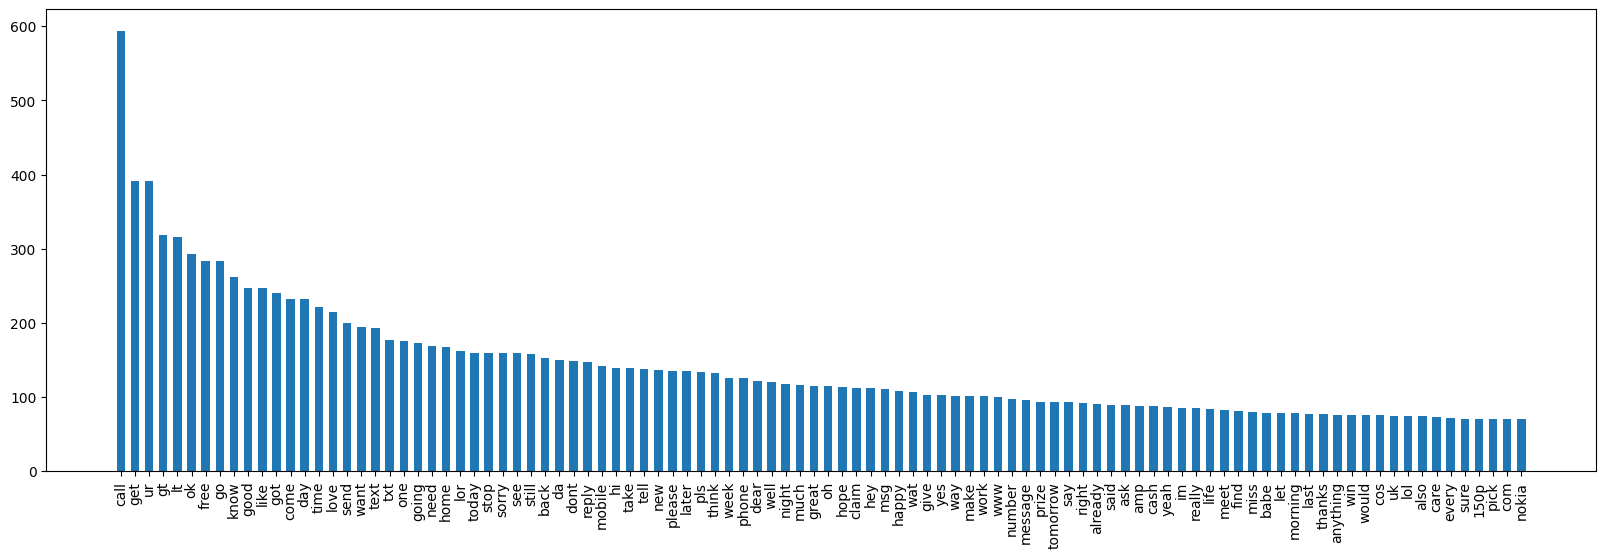

In [11]:
plt.figure(figsize=(20, 6))
plt.xticks(rotation = 90)
plt.bar(frequency['Word'][:100], frequency['Frequency'][:100], width=0.6)

In [9]:
# Stemming
stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(word) for word in important_words]
#stemmed_tokens = [stemmer.stem(word) if word[-1] != 'y' else word for word in important_words]
print(stemmed_tokens)

# Stemming is faster, but may produce stems that are not words.
# Used, mainly, for information retrieval

['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'great', 'world', 'la', 'buffet', 'cine', 'got', 'amor', 'wat', 'ok', 'lar', 'joke', 'wif', 'oni', 'free', 'entri', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', '21st', 'may', '2005', 'text', 'fa', '87121', 'receiv', 'entri', 'question', 'std', 'txt', 'rate', 'appli', '08452810075over18', 'dun', 'say', 'earli', 'hor', 'alreadi', 'say', 'nah', 'think', 'goe', 'usf', 'live', 'around', 'though', 'freemsg', 'hey', 'darl', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chg', 'send', '50', 'rcv', 'even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent', 'per', 'request', 'mell', 'mell', 'oru', 'minnaminungint', 'nurungu', 'vettam', 'set', 'callertun', 'caller', 'press', 'copi', 'friend', 'callertun', 'winner', 'valu', 'network', 'custom', 'select', 'receivea', '900', 'prize', 'reward', 'claim', 'call', '09061701461', 'claim', 'code', 'kl341', 'valid', '12', 'hour', 'mobil', '11', 'month', 'enti

In [10]:
# # If the use of lemmatizer report an error, execute the commands below 
#
# import nltk
# nltk.download('wordnet')

# Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in important_words]
print(lemmatized_tokens)

# Lemmatization is slower, but may produce lemmas that are valid words.
# Lemmatization uses a more linguistically informed approach, 
# involving a dictionary or a morphological analysis of words.
# Used, mainly, for information sentiment analysis and machine translation.

['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'great', 'world', 'la', 'buffet', 'cine', 'got', 'amore', 'wat', 'ok', 'lar', 'joking', 'wif', 'oni', 'free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005', 'text', 'fa', '87121', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'apply', '08452810075over18', 'dun', 'say', 'early', 'hor', 'already', 'say', 'nah', 'think', 'go', 'usf', 'life', 'around', 'though', 'freemsg', 'hey', 'darling', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'send', '50', 'rcv', 'even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent', 'per', 'request', 'melle', 'melle', 'oru', 'minnaminunginte', 'nurungu', 'vettam', 'set', 'callertune', 'caller', 'press', 'copy', 'friend', 'callertune', 'winner', 'valued', 'network', 'customer', 'selected', 'receivea', '900', 'prize', 'reward', 'claim', 'call', '09061701461', 'claim', 'code', 'kl341', 'valid', '12', 'hour', 'mobi

In [11]:
cleaned = texts['Text'].apply(lambda row: row.split())
new_cleaned = []

s = set(stopwords.words('english'))
for i in range(len(cleaned)):
    prototype = []
    all_text = ' '
    all_text = ' '.join(cleaned[i])
    tokenizer = RegexpTokenizer(r'\w+')
    clean_line = tokenizer.tokenize(all_text)
    for j in clean_line:
        if j not in s:
            prototype.append(lemmatizer.lemmatize(j.lower()))
    row = ' '.join(prototype)
    new_cleaned.append(row)
print(new_cleaned)
#clean and lemmatize for each row in dataframe, after, use this in the CountVectorizer and tf-idf

['go jurong point crazy available bugis n great world la e buffet cine got amore wat', 'ok lar joking wif u oni', 'free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry question std txt rate t c apply 08452810075over18', 'u dun say early hor u c already say', 'nah i think go usf life around though', 'freemsg hey darling 3 week word back i like fun still tb ok xxx std chgs send 1 50 rcv', 'even brother like speak they treat like aid patent', 'a per request melle melle oru minnaminunginte nurungu vettam set callertune caller press 9 copy friend callertune', 'winner a valued network customer selected receivea 900 prize reward to claim call 09061701461 claim code kl341 valid 12 hour', 'had mobile 11 month u r entitled update latest colour mobile camera free call the mobile update co free 08002986030', 'i gonna home soon want talk stuff anymore tonight k i cried enough today', 'six chance win cash from 100 20 000 pound txt csh11 send 87575 cost 150p day 6day

In [12]:
teste = np.array(new_cleaned)
dfTeste = pd.DataFrame(teste)
dfTeste.columns = ['Text']
matrix = dfTeste['Text'].apply([lambda row: row.split()])
dfTeste


Text
0     go jurong point crazy available bugis n great ...
1                               ok lar joking wif u oni
2     free entry 2 wkly comp win fa cup final tkts 2...
3                   u dun say early hor u c already say
4                 nah i think go usf life around though
...                                                 ...
5567  this 2nd time tried 2 contact u u 750 pound pr...
5568                   will ü b going esplanade fr home
5569                            pity mood so suggestion
5570  the guy bitching i acted like interested buyin...
5571                                  rofl it true name

[5572 rows x 1 columns]

In [13]:
def transform_message(message):
    message_not_punc = [] # Message without punctuation
    i = 0
    for punctuation in message:
        if punctuation not in string.punctuation:
            message_not_punc.append(punctuation)
    # Join words again to form the string.
    message_not_punc = ''.join(message_not_punc) 

    # Remove any stopwords for message_not_punc, but first we should     
    # to transform this into the list.
    message_clean = list(message_not_punc.split(" "))
    while i <= len(message_clean):
        for mess in message_clean:
            if mess.lower()  in stopwords.words('english'):
                message_clean.remove(mess)
        i =i +1
    return  message_clean

In [14]:
texts['Class'] = 0
for i in range(len(texts)):
    if texts['Classification'][i] == 'ham':
        texts['Class'][i] = 0
    else:
        texts['Class'][i] = 1
texts

/tmp/ipykernel_29906/3724496726.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texts['Class'][i] = 0
/tmp/ipykernel_29906/3724496726.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texts['Class'][i] = 0
/tmp/ipykernel_29906/3724496726.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texts['Class'][i] = 1
/tmp/ipykernel_29906/3724496726.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

Classification                                               Text  \
0               ham  Go until jurong point, crazy.. Available only ...   
1               ham                      Ok lar... Joking wif u oni...   
2              spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3               ham  U dun say so early hor... U c already then say...   
4               ham  Nah I don't think he goes to usf, he lives aro...   
...             ...                                                ...   
5567           spam  This is the 2nd time we have tried 2 contact u...   
5568            ham               Will ü b going to esplanade fr home?   
5569            ham  Pity, * was in mood for that. So...any other s...   
5570            ham  The guy did some bitching but I acted like i'd...   
5571            ham                         Rofl. Its true to its name   

      Number_Of_Words  Class  
0                  20      0  
1                   6      0  
2                  28      1  
3                  11      0  
4                  13      0  
...               ...    ...  
5567               30      1  
5568                8      0  
5569               10      0  
5570               26      0  
5571                6      0  

[5572 rows x 4 columns]

## K-FOLD

In [15]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
fold_index = list(kf.split(dfTeste['Text']))
print(fold_index[0][0])

[ 558  559  560 ... 5569 5570 5571]


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB

svc_f1 = []
nb_f1 = []
knn_f1 = []
for i in range(10):
    #Get train and test indexes
    train_ini = fold_index[i][0][0]
    train_end = fold_index[i][0][-1]
    test_ini = fold_index[i][1][0]
    test_end = fold_index[i][1][-1]

    #Generate train_set representation
    vectorization_train = CountVectorizer(analyzer=transform_message)
    vectorization_train.fit(dfTeste['Text'][train_ini:train_end])
    X_transform_train = vectorization_train.transform(dfTeste['Text'][train_ini:train_end])
    tfidf_transformer_train = TfidfTransformer().fit(X_transform_train)
    X_tfidf_train = tfidf_transformer_train.transform(X_transform_train)

    #Generate test_set representation
    X_transform_test = vectorization_train.transform(dfTeste['Text'][test_ini:test_end])
    tfidf_transformer_test = TfidfTransformer().fit(X_transform_test)
    X_tfidf_test = tfidf_transformer_test.transform(X_transform_test)

    #SVC Score
    svc_model = SVC(C = 10, gamma = 0.1, kernel = 'rbf')
    svc_model.fit(X_tfidf_train, texts['Classification'][train_ini:train_end])
    svc_predictions = svc_model.predict(X_tfidf_test)
    svc_score = f1_score(texts['Classification'][test_ini:test_end], svc_predictions, average='macro')
    svc_f1.append(svc_score)

    #NB Score
    nb_model = GaussianNB()
    nb_model.fit(X_tfidf_train.toarray(), texts['Classification'][train_ini:train_end])
    nb_predictions = nb_model.predict(X_tfidf_test.toarray())
    nb_score = f1_score(texts['Classification'][test_ini:test_end], nb_predictions, average='macro')
    nb_f1.append(nb_score)

    #KNN Score
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_tfidf_train, texts['Classification'][train_ini:train_end])
    knn_predictions = knn_model.predict(X_tfidf_test)
    knn_score = f1_score(texts['Classification'][test_ini:test_end], knn_predictions, average='macro')
    knn_f1.append(knn_score)

In [ ]:
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests

t_statistic, p_values = zip(ttest_ind(svc_f1, nb_f1), ttest_ind(svc_f1, knn_f1), ttest_ind(nb_f1, knn_f1))

alpha = 0.05
adjusted_p_values = multipletests(p_values, method='bonferroni')[1]
print(t_statistic)
print(p_values)
print(adjusted_p_values)

(13.326650536777164, 21.57193695932222, 5.996876870435887)
(9.166470405601803e-11, 2.5988976143937927e-14, 1.1342295024396353e-05)
[2.74994112e-10 7.79669284e-14 3.40268851e-05]


In [ ]:
print(svc_f1)
print(nb_f1)
print(knn_f1)

[0.9926248609713468, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9920224977043159, 1.0, 1.0, 0.9796948382525874]
[0.8226566479877738, 0.8802322247706422, 0.880207082925508, 0.8644185884484079, 0.88068669527897, 0.8696448373095079, 0.86821216938864, 0.8885149598703712, 0.9046148567507291, 0.8056752933344429]
[0.7184973045822103, 0.8218550106609808, 0.805707629586488, 0.801868037060655, 0.801868037060655, 0.7908289094177152, 0.7549725298939389, 0.8034641215977377, 0.7844044072445264, 0.7733255678509028]


# FAST TEXT

In [16]:
from nltk.tokenize import word_tokenize
from gensim.models import FastText

def average_word_vectors(words, model, num_features):
    feature_vector = np.zeros((num_features,), dtype="float32")
    n_words = 0
    for word in words:
        if word in model.wv:
            n_words += 1
            feature_vector = np.add(feature_vector, model.wv[word])
    if n_words > 0:
        feature_vector = np.divide(feature_vector, n_words)
    return feature_vector
# --------------------------- #

model = FastText(vector_size=128, window=5, min_count=3, epochs = 10)

In [28]:
te = [0, 1, 2, 3, 4]
print(te[0:5])

[0, 1, 2, 3, 4]


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB

svc_scores = []
nb_scores = []
knn_scores = []
for i in range(10):

    train_ini = fold_index[i][0][0]
    train_end = fold_index[i][0][-1]
    test_ini = fold_index[i][1][0]
    test_end = fold_index[i][1][-1]

    sentences_train = [word_tokenize(rev.lower()) for rev in dfTeste.Text[train_ini:train_end+1]]
    sentences_test = [word_tokenize(rev.lower()) for rev in dfTeste.Text[test_ini:test_end]]
    print(f'{train_ini} == {train_end}')
    print(len(sentences_train))
    model.build_vocab(sentences_train)


    vectors_train = [average_word_vectors(words, model, 128) for words in sentences_train]
    vectors_test = [average_word_vectors(words, model, 128) for words in sentences_test]
    print(f'{len(vectors_train)}')

    #SVC Score
    svc_m = SVC(C = 10, gamma = 0.1, kernel = 'rbf')
    svc_m.fit(vectors_train, texts['Classification'][train_ini:])
    svc_p = svc_m.predict(vectors_test)
    svc_score = f1_score(texts['Classification'][test_ini:test_end], svc_p, average='macro')
    svc_scores.append(svc_score)

    #NB Score
    nb_model = GaussianNB()
    nb_model.fit(vectors_train, texts['Classification'][train_ini:])
    nb_predictions = nb_model.predict(vectors_test)
    nb_score = f1_score(texts['Classification'][test_ini:test_end], nb_predictions, average='macro')
    nb_scores.append(nb_score)

    #KNN Score
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(vectors_train, texts['Classification'][train_ini:])
    knn_predictions = knn_model.predict(vectors_test)
    knn_score = f1_score(texts['Classification'][test_ini:test_end], knn_predictions, average='macro')
    knn_scores.append(knn_score)

In [39]:
print(svc_scores)
print(nb_scores)
print(knn_scores)

[0.46131528046421666, 0.4571150097465887, 0.4669223394055608, 0.4653846153846154, 0.4653846153846154, 0.4689589302769818, 0.4648700673724735, 0.45966958211856174, 0.4648700673724735, 0.4653846153846154]
[0.5542333582647718, 0.5248894183531343, 0.5252684981334355, 0.5153427710776903, 0.5383217396753774, 0.5306063444702726, 0.5386064593301435, 0.5439723120266875, 0.5230353532490599, 0.5246794150731158]
[0.6278064861012116, 0.6911193852491484, 0.7345428503222725, 0.7402965284474445, 0.7577581033646534, 0.7493802118548569, 0.7651431950663174, 0.7269886617266315, 0.7004701580253363, 0.5572635369062456]


# BERT ZERO SHOT

In [ ]:
from transformers import pipeline
zero_shot_classification = []

classifier = pipeline(task='zero-shot-classification')
labels = ['ham', 'spam']

result = classifier(dfTeste['Text'], labels)

# === IGNORA A PARTIR DAQUI ===

# SVM Training

In [ ]:
from sklearn.svm import SVC

svc_param_grid = {
                  'C': [0.1, 1, 10],
                  'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                  'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
                }

grid = GridSearchCV(SVC(), svc_param_grid)

In [ ]:
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_estimator_)
params = grid.best_params_
print(params)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1)


In [ ]:
from sklearn.metrics import classification_report
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1448
        spam       0.98      0.85      0.91       224

    accuracy                           0.98      1672
   macro avg       0.98      0.92      0.95      1672
weighted avg       0.98      0.98      0.98      1672



### K-Fold

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=10)
model = SVC(C=params.get('C'), gamma=params.get('gamma'), kernel=params.get('kernel'))
cv_results_svm = cross_val_score(model, X_tfidf, texts['Classification'], cv=kf, scoring='f1_macro')
print(cv_results_svm.mean())

NameError: name 'SVC' is not defined

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
model_GaussianNB = GaussianNB().fit(X_train.toarray(), y_train)
predictions_GaussianNB = model_GaussianNB.predict(X_test.toarray())
print('predicted', predictions_GaussianNB)

predicted ['ham' 'ham' 'spam' ... 'ham' 'ham' 'spam']


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_GaussianNB))

              precision    recall  f1-score   support

         ham       0.98      0.89      0.93      1448
        spam       0.55      0.86      0.67       224

    accuracy                           0.89      1672
   macro avg       0.76      0.88      0.80      1672
weighted avg       0.92      0.89      0.90      1672



### K-Fold

In [ ]:
kf = KFold(n_splits=10)
model = GaussianNB()
cv_results_NB = cross_val_score(model, X_tfidf.toarray(), texts['Classification'], cv=kf, scoring='f1_macro')
print(cv_results_NB.mean())

0.8030471497877401


# KNN Training

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_param_grid = {
                  'n_neighbors': [1, 3, 5, 10, 12, 13, 14, 15, 20],
                  'algorithm': ['auto', 'brute']
                }

grid_knn = GridSearchCV(KNeighborsClassifier(), knn_param_grid)

In [ ]:
from sklearn.metrics import classification_report
grid_knn.fit(X_train, y_train)
grid_knn_predictions = grid_knn.predict(X_test)
print(classification_report(y_test, grid_knn_predictions))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1448
        spam       0.99      0.67      0.79       224

    accuracy                           0.95      1672
   macro avg       0.97      0.83      0.88      1672
weighted avg       0.96      0.95      0.95      1672



In [ ]:
print(grid_knn.best_estimator_)
print(grid_knn.best_params_)

KNeighborsClassifier()
{'algorithm': 'auto', 'n_neighbors': 5}


### K-Fold

In [ ]:
kf = KFold(n_splits=10)
model = KNeighborsClassifier()
cv_results_knn = cross_val_score(model, X_tfidf, texts['Classification'], cv=kf, scoring='f1_macro')
print(cv_results_knn.mean())

0.7187683885888626


### T-Test

In [ ]:
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests

t_stat, p_value = ttest_ind(cv_results_svm, cv_results_NB)

reject, p_adjusted, _, _ = multipletests([p_value], method='bonferroni', alpha=0.05)

if reject:
    if t_stat > 0:
        print(f"Há diferença de desempenho entre os algoritmos. A média do SVM é maior do que do Naive Bayes. p-value: {p_value}, t-statistic: {t_stat}")
    else:
        print(f"Há diferença de desempenho entre os algoritmos. A média do Naive Bayes é maior do que do SVM. p-value: {p_value}, t-statistic: {t_stat}")
else:
    print(f"O desempenho dos algoritmos é parecido. p = {p_adjusted}")

Há diferença de desempenho entre os algoritmos. A média do SVM é maior do que do Naive Bayes. p-value: 5.724150538556934e-14, t-statistic: 20.61134537098432


In [ ]:
t_stat_2, p_value_2 = ttest_ind(cv_results_svm, cv_results_knn)

reject2, p_adjusted_2, _, _ = multipletests([p_value_2], method='bonferroni', alpha=0.05)
if reject2:
    if t_stat_2 > 0:
        print(f"Há diferença de desempenho entre os algoritmos. A média do SVM é maior do que do KNN. p-value: {p_value_2}, t-statistic: {t_stat_2}")
    else:
        print(f"Há diferença de desempenho entre os algoritmos. A média do KNN é maior do que do SVM. p-value: {p_value_2}, t-statistic: {t_stat_2}")
else:
    print(f"O desempenho dos algoritmos é parecido. p = {p_adjusted}")

Há diferença de desempenho entre os algoritmos. A média do SVM é maior do que do KNN. p-value: 1.9738065184902825e-16, t-statistic: 28.506785258712103


In [ ]:
t_stat_3, p_value_3 = ttest_ind(cv_results_NB, cv_results_knn)

reject3, p_adjusted_3, _, _ = multipletests([p_value_3], method='bonferroni', alpha=0.05)
if reject3:
    if t_stat_3 > 0:
        print(f"Há diferença de desempenho entre os algoritmos. A média do Naive Bayes é maior do que do KNN. p-value: {p_value_3}, t-statistic: {t_stat_3}")
    else:
        print(f"Há diferença de desempenho entre os algoritmos. A média do KNN é maior do que do Naive Bayes. p-value: {p_value_3}, t-statistic: {t_stat_3}")
else:
    print(f"O desempenho dos algoritmos é parecido. p = {p_adjusted}")

Há diferença de desempenho entre os algoritmos. A média do Naive Bayes é maior do que do KNN. p-value: 1.056118062916277e-07, t-statistic: 8.48126459244922


### Wilcoxon Test


In [ ]:
from scipy.stats import wilcoxon

t_statistic_1, p_value_1 = wilcoxon(cv_results_svm, cv_results_NB)

if p_value_1:
    if t_statistic_1 > 0:
        print(f"Há diferença de desempenho entre os algoritmos. A média do SVM é maior do que do Naive Bayes. p-value: {p_value_1}, t-statistic: {t_statistic_1}")
    else:
        print(f"Há diferença de desempenho entre os algoritmos. A média do Naive Bayes é maior do que do SVM. p-value: {p_value_1}, t-statistic: {t_statistic_1}")
else:
    print(f"O desempenho dos algoritmos é parecido. p = {p_value_1}")

Há diferença de desempenho entre os algoritmos. A média do Naive Bayes é maior do que do SVM. p-value: 0.001953125, t-statistic: 0.0


In [ ]:
t_statistic_2, p_value_2 = wilcoxon(cv_results_svm, cv_results_knn)

if p_value_2:
    if t_statistic_2 > 0:
        print(f"Há diferença de desempenho entre os algoritmos. A média do SVM é maior do que do KNN. p-value: {p_value_2}, t-statistic: {t_statistic_2}")
    else:
        print(f"Há diferença de desempenho entre os algoritmos. A média do KNN é maior do que do SVM. p-value: {p_value_2}, t-statistic: {t_statistic_2}")
else:
    print(f"O desempenho dos algoritmos é parecido. p = {p_value_2}")

Há diferença de desempenho entre os algoritmos. A média do KNN é maior do que do SVM. p-value: 0.001953125, t-statistic: 0.0


In [ ]:
t_statistic_3, p_value_3 = wilcoxon(cv_results_NB, cv_results_knn)

if p_value_3:
    if t_statistic_3 > 0:
        print(f"Há diferença de desempenho entre os algoritmos. A média do Naive Bayes é maior do que do KNN. p-value: {p_value_3}, t-statistic: {t_statistic_3}")
    else:
        print(f"Há diferença de desempenho entre os algoritmos. A média do KNN é maior do que do Naive Bayes. p-value: {p_value_3}, t-statistic: {t_statistic_3}")
else:
    print(f"O desempenho dos algoritmos é parecido. p = {p_value_3}")

Há diferença de desempenho entre os algoritmos. A média do KNN é maior do que do Naive Bayes. p-value: 0.001953125, t-statistic: 0.0
